# Lecture 2 Workbook
## Estimators and the plug in principle
This is a workbook that contains the python code that was used in slides
appearing in the lecture. It is provided so that you can see for yourself
how this code works.

## Definitions and setup
Code here is just for making everything look sort of *uniform*

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gamma, norm, t
import pandas as pd

In [2]:
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.markersize'] = 10

This is the seed for the random number generator. Graphs for the course will be generated with seed 367 (for BME). You can change it or use 'shuffle' to get different pseudo-random numbers each time.

In [3]:
np.random.seed(367)

## Load data
Load data on cerebellar volumes

In [5]:
cerebellar_volumes_df = pd.read_csv('https://github.com/opherdonchin/StatisticalComputationAndAnalysis/raw/main/Data/cerebellar_volumes.csv')
# print(TCV_Corr.reshape((6, 10))) # Show it so we can copy it into the power point

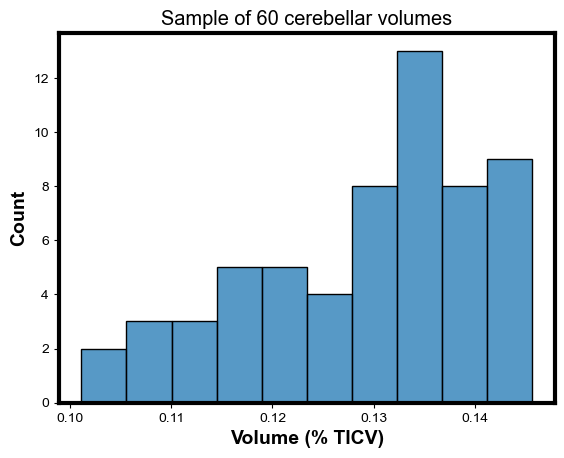

In [6]:
TCV_Corr = cerebellar_volumes_df.TCV_Corr
numCblm = 60

# Randomly sample 60 cerebellar volumes
cblmSample = TCV_Corr.sample(numCblm)

def drawSample():
  # Plot a histogram of the sample using Seaborn
  sns.histplot(data=cblmSample, kde=False, bins=10)
  sns.set_style("whitegrid")
  sns.set_context("notebook", font_scale=1.2)
  plt.xlabel('Volume (% TICV)')
  plt.ylabel('Count')
  plt.title('Sample of 60 cerebellar volumes')
  
drawSample()

## Choose a model
We'll use the normal distribution because it's simple, although it may not be the best choice.


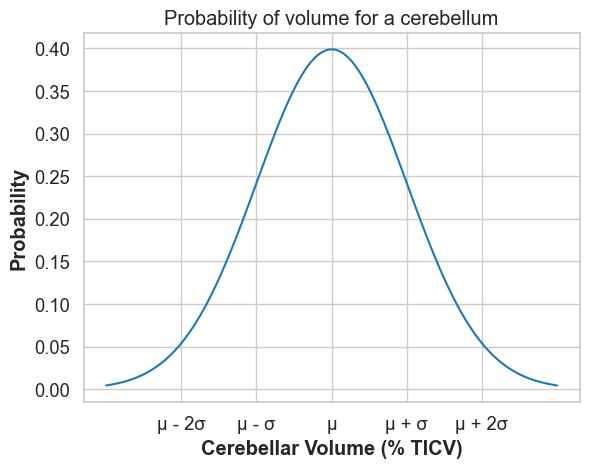

In [7]:
def drawPopulation():
  # Generate the x-axis values for the normal distribution
  normVols = np.linspace(-3, 3, 100)

  # Generate the y-axis values for the normal distribution
  normDist = 1 / np.sqrt(2 * np.pi) * np.exp(-0.5 * normVols**2)

  # Plot the normal distribution
  fig, ax = plt.subplots()
  ax.plot(normVols, normDist)

  # Set the x-axis and y-axis labels and title
  ax.set_xlabel('Cerebellar Volume (% TICV)')
  ax.set_ylabel('Probability')
  ax.set_title('Probability of volume for a cerebellum')

  # Set the x-axis tick labels
  xtick_locs = np.array([-2, -1, 0, 1, 2])
  xtick_labels = ['μ - 2σ', 'μ - σ', 'μ', 'μ + σ', 'μ + 2σ']
  ax.set_xticks(xtick_locs, xtick_labels)

  return fig, ax

fig, ax = drawPopulation()

## Choose a parameter

Text(0.5, 1.0, 'Population mean')

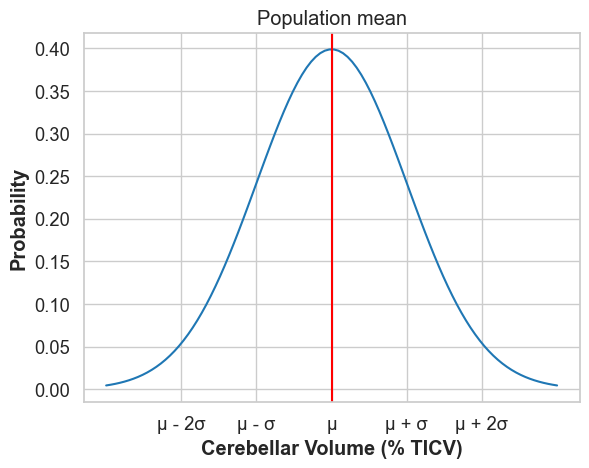

In [8]:
fig, ax = drawPopulation()

popMean = 0
ax.axvline(popMean, color='r')
ax.set_title('Population mean')
# Show the plot


## Sample mean as plug in estimate

Sample mean = 0.12919041338766865


Text(0.5, 1.0, 'Sample mean')

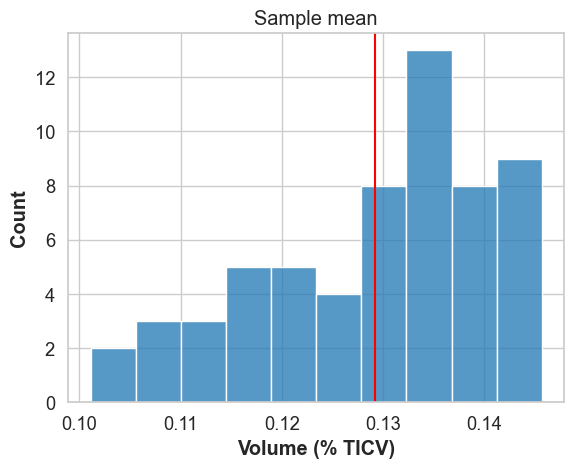

In [9]:
drawSample()

sampleMean = np.mean(cblmSample)
print('Sample mean =', sampleMean)

# plot the sample mean as a red line on the current plot
plt.axvline(x=sampleMean, color='r')

# set the plot title
plt.title('Sample mean')


## Population median figure

(-0.015284516835152185, 0.418475518600832)

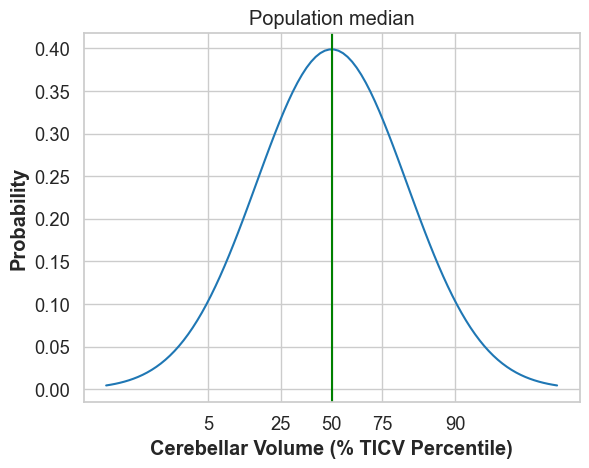

In [10]:
drawPopulation()

# assume gca returns the current axes object
popMedian = 0

# plot the population median as a green line on the current plot
plt.axvline(x=popMedian, color='g')

# set the plot title and x-axis label
plt.title('Population median')
plt.xlabel('Cerebellar Volume (% TICV Percentile)')

# set the x-axis tick locations and labels
quantiles = np.array([0.05, 0.25, 0.5, 0.75, 0.95])
xticks = norm.ppf(quantiles, loc=0, scale=1)
xticklabels = ['5', '25', '50', '75', '90']
plt.xticks(xticks, xticklabels)

# set the y-axis limits to match the original plot
yLim = plt.ylim()  # get the current y-axis limits
plt.ylim(yLim)  # set the y-axis limits to match the original plot


## Plug in estimate for median

Sample median = 0.1325558128947965


Text(0.5, 1.0, 'Sample median')

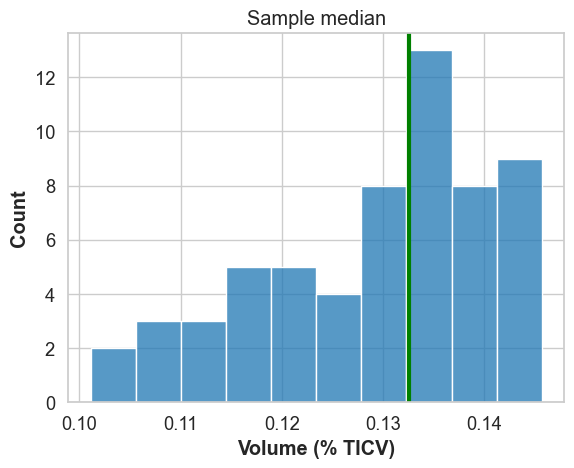

In [11]:
drawSample()

sampleMedian = np.median(cblmSample)
print('Sample median =', sampleMedian)

# plot the sample median as a green line on the current plot
plt.axvline(x=sampleMedian, color='g', linewidth=3)

# set the plot title
plt.title('Sample median')


## Population standard deviation figure

Text(0.5, 1.0, 'Population Standard Deviation')

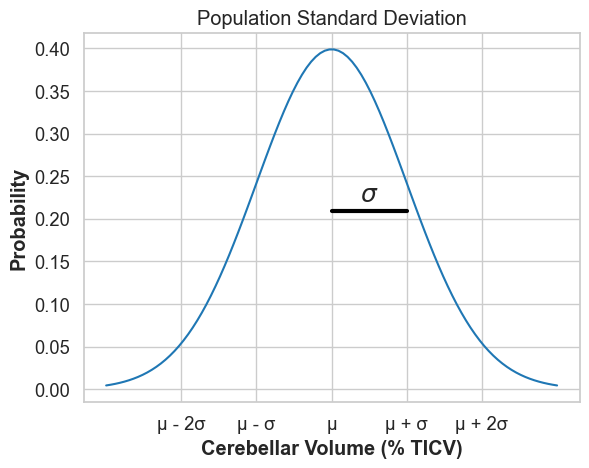

In [12]:
drawPopulation()

popMean = 0
popStd = 1

# plot the population standard deviation as a black line on the current plot
yLim = plt.gca().get_ylim()
plt.plot([popMean, popMean+popStd], [yLim[1]/2, yLim[1]/2], color='k', linewidth=3)

# add the sigma symbol to the plot
plt.text(0.5, 0.22, r'$\sigma$', fontsize=18, fontweight='bold', ha='center')

# set the plot title
plt.title('Population Standard Deviation')


## Plug in estimate of standard deviation

Sample std = 0.011551070114289677


Text(0.5, 1.0, 'Plug-in Sample Standard Deviation')

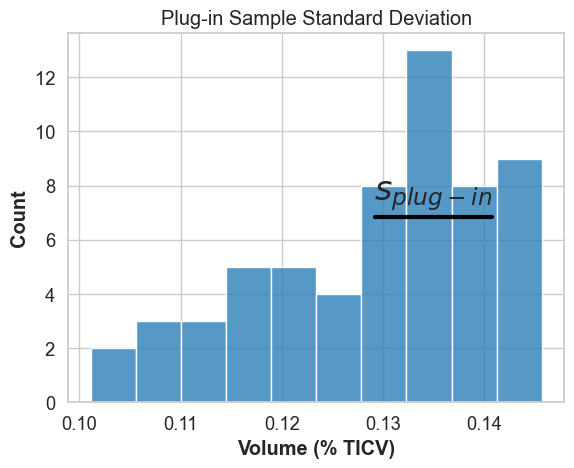

In [13]:
drawSample()

sampleMean = np.mean(cblmSample)
sampleStd = np.std(cblmSample, ddof=1) # the ddof parameter specifies to use the plug-in estimate

# print the sample standard deviation
print('Sample std =', sampleStd)

# plot the plug-in sample standard deviation as a black line on the current plot
yLim = plt.gca().get_ylim()
plt.plot([sampleMean, sampleMean+sampleStd], [yLim[1]/2, yLim[1]/2], color='k', linewidth=3)

# add the s_plugin label to the plot
plt.text(sampleMean+sampleStd/2, yLim[1]/1.95, r'$s_{plug-in}$', fontsize=24, fontweight='bold', ha='center', va='bottom')

# set the plot title
plt.title('Plug-in Sample Standard Deviation')


# Bias and variance of estimates of sd
We will compare the bias and variance of the plug-in and the normal estimate of the standard deviation
We will use a "real" population that has a t distribution

In [14]:
from scipy.stats import t
realPopulation = t(df=10, loc=0, scale=1)

## Plot the real distribution

The standard deviation of this t distribution is: 1.118033988749895


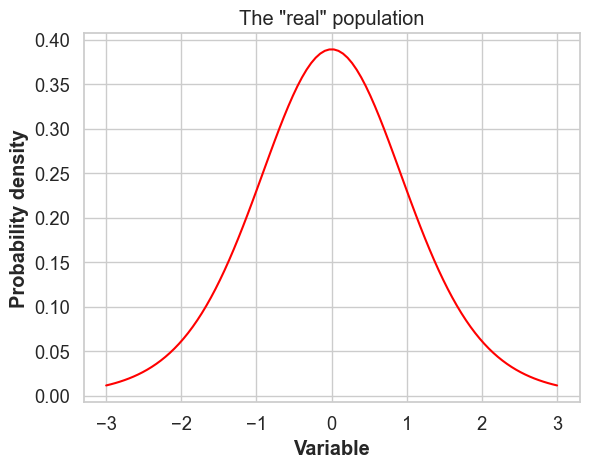

In [15]:
x = np.linspace(-3, 3, 100)
t_pdf = realPopulation.pdf(x)
plt.figure()
plt.plot(x, t_pdf, 'r')
plt.xlabel('Variable')
plt.ylabel('Probability density')
plt.title('The "real" population')

pop_std = realPopulation.std()
print('The standard deviation of this t distribution is:', pop_std)

## Now sample the population


### First sample

The plug-in estimate of the standard deviation from sample 1 is: 0.812


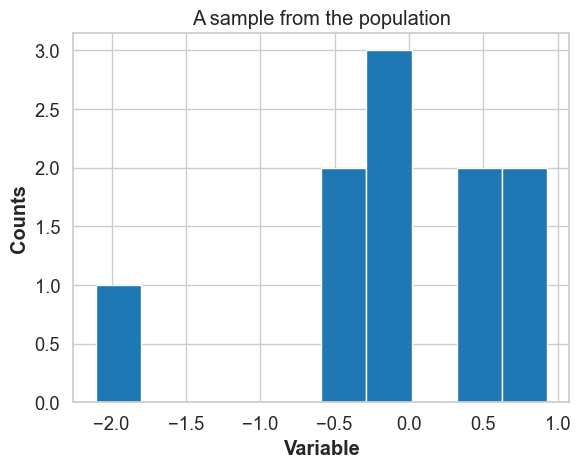

In [16]:
N = 10
sample1 = realPopulation.rvs(size=N)

fig, ax = plt.subplots()
ax.hist(sample1, bins=10)
ax.set_xlabel('Variable')
ax.set_ylabel('Counts')
ax.set_title('A sample from the population')

samp1Std = np.std(sample1, ddof=0)
print(f"The plug-in estimate of the standard deviation from sample 1 is: {samp1Std:.3g}")

### More samples

The plug-in estimate of the standard deviation from sample 2 is: 1.265
The plug-in estimate of the standard deviation from sample 3 is: 1.056


Text(0.5, 1.0, 'Sample 3: s=1.056')

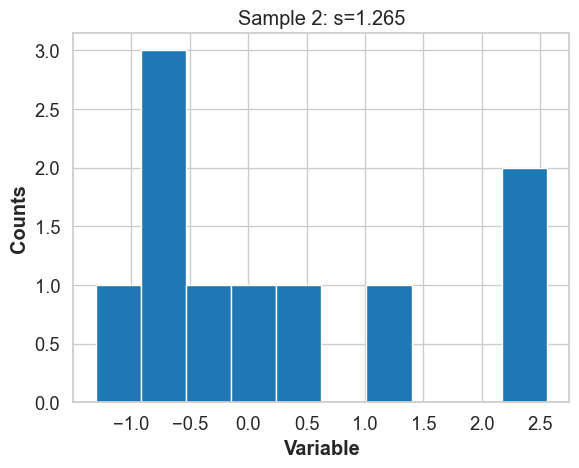

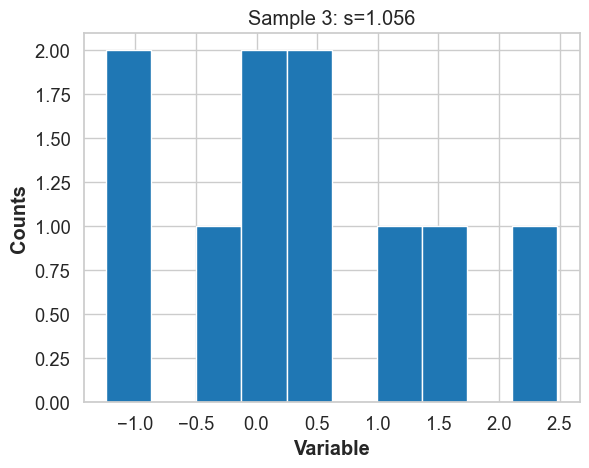

In [17]:
sample2 = realPopulation.rvs(size=N)
samp2Std = np.std(sample2, ddof=0)
print(f"The plug-in estimate of the standard deviation from sample 2 is: {samp2Std:.3f}")

plt.figure()
plt.hist(sample2, bins=10)
plt.xlabel('Variable')
plt.ylabel('Counts')
plt.title(f"Sample 2: s={samp2Std:.3f}")

sample3 = realPopulation.rvs(size=N)
samp3Std = np.std(sample3, ddof=0)
print(f"The plug-in estimate of the standard deviation from sample 3 is: {samp3Std:.3f}")

plt.figure()
plt.hist(sample3, bins=10)
plt.xlabel('Variable')
plt.ylabel('Counts')
plt.title(f"Sample 3: s={samp3Std:.3f}")

## Generate samples to show the whole distribution

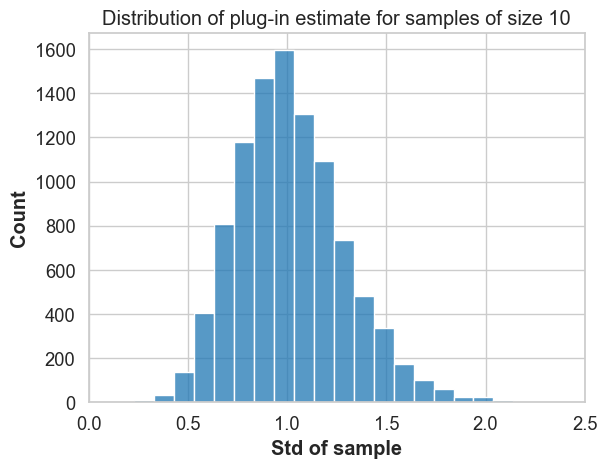

In [18]:
num_samples = 10000
samples = realPopulation.rvs(size=(N, num_samples))
samples_std = np.std(samples, axis=0, ddof=0)

def drawPlugInStd():
  plt.figure()
  sns.histplot(data=samples_std, bins=30)
  plt.xlabel('Std of sample')
  plt.ylabel('Count')
  plt.title('Distribution of plug-in estimate for samples of size 10')
  plt.xlim(0, 2.5)

drawPlugInStd()

### Add the mean to the plot

Mean of distribution: std=1.056


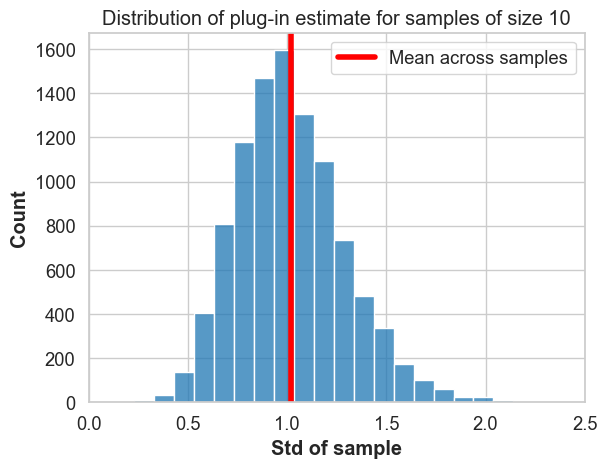

In [19]:
def drawPlugInStdWithMean():
  drawPlugInStd()

  meanPlugInStd = np.mean(samples_std)
  print(f"Mean of distribution: std={samp3Std:.3f}")

  yLim = plt.gca().get_ylim()
  plt.axvline(meanPlugInStd, color='r', linewidth=4, label="Mean across samples")
  
drawPlugInStdWithMean()
plt.legend()



### Compare to true mean

Mean of distribution: std=1.056


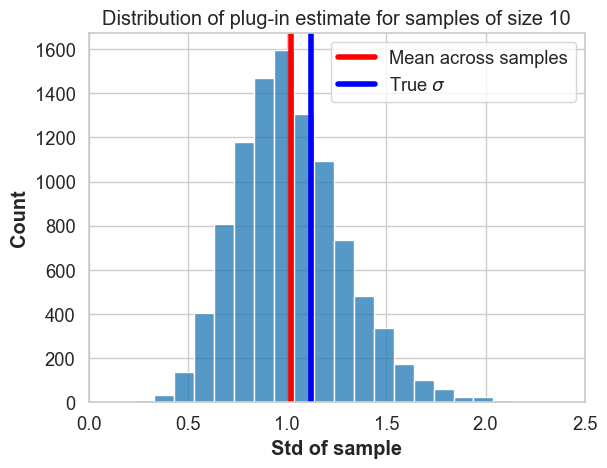

In [20]:
drawPlugInStdWithMean()
plt.axvline(pop_std, color='b', linewidth=4, label='True $\sigma$')

plt.legend()

## Explore other sample sizes

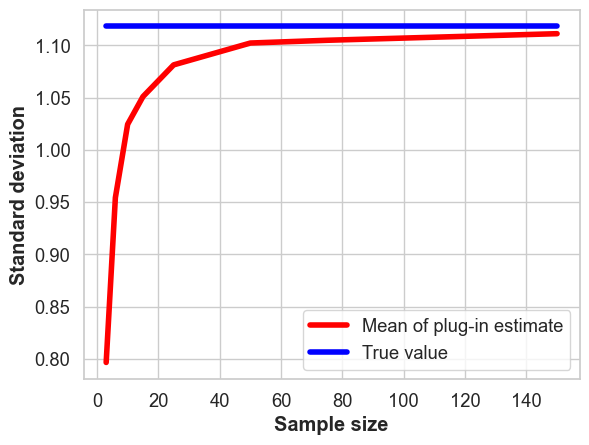

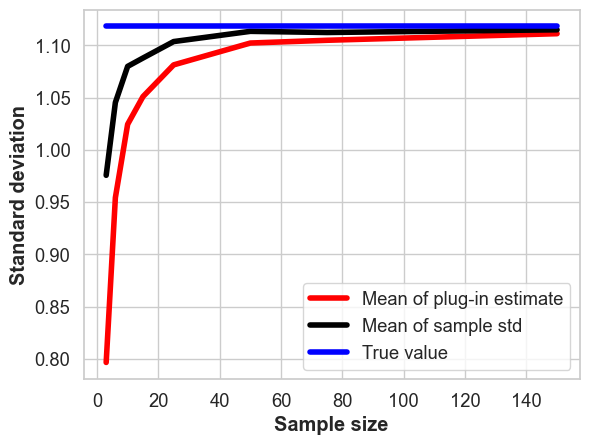

In [21]:
sample_sizes = [3, 6, 10, 15, 25, 50, 75, 150]
num_sizes = len(sample_sizes)

all_plug_in_stds = np.zeros((num_samples, num_sizes))
all_sample_stds = np.zeros((num_samples, num_sizes))

for i, n in enumerate(sample_sizes):
    samples = realPopulation.rvs(size=(n, num_samples))
    all_plug_in_stds[:, i] = np.std(samples, ddof=0, axis=0)
    all_sample_stds[:, i] = np.std(samples, ddof=1, axis=0)

plt.plot(sample_sizes, np.mean(all_plug_in_stds, axis=0), color='r', linewidth=4, label='Mean of plug-in estimate')
plt.plot(sample_sizes, np.repeat(pop_std, num_sizes), color='b', linewidth=4, label='True value')
plt.xlabel('Sample size')
plt.ylabel('Standard deviation')
plt.legend(loc='best')

plt.figure()
plt.plot(sample_sizes, np.mean(all_plug_in_stds, axis=0), color='r', linewidth=4, label='Mean of plug-in estimate')
plt.plot(sample_sizes, np.mean(all_sample_stds, axis=0), color='k', linewidth=4, label='Mean of sample std')
plt.plot(sample_sizes, np.repeat(pop_std, num_sizes), color='b', linewidth=4, label='True value')
plt.xlabel('Sample size')
plt.ylabel('Standard deviation')
plt.legend(loc='best')


## Sample standard deviation is unbiased

Mean of distribution: std=1.056


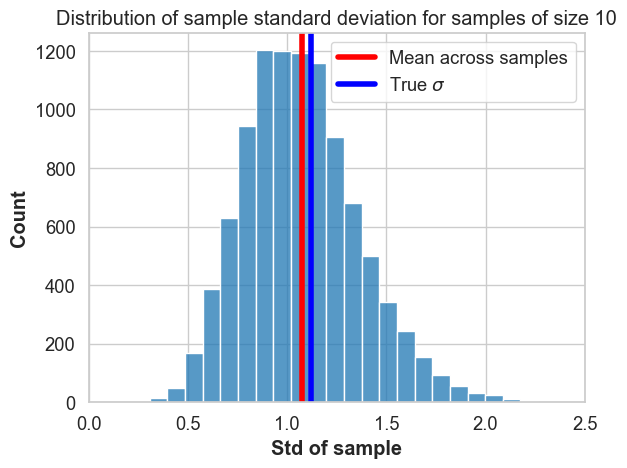

In [39]:
num_samples = 10000
N=10
samples = realPopulation.rvs(size=(N, num_samples))
samples_std = np.std(samples, axis=0, ddof=1)

def drawPlugInStd():
  plt.figure()
  sns.histplot(data=samples_std, bins=30)
  plt.xlabel('Std of sample')
  plt.ylabel('Count')
  plt.title('Distribution of sample standard deviation for samples of size 10')
  plt.xlim(0, 2.5)

def drawPlugInStdWithMean():
  drawPlugInStd()

  meanPlugInStd = np.mean(samples_std)
  print(f"Mean of distribution: std={samp3Std:.3f}")

  yLim = plt.gca().get_ylim()
  plt.axvline(meanPlugInStd, color='r', linewidth=4, label="Mean across samples")
  
drawPlugInStdWithMean()
plt.axvline(pop_std, color='b', linewidth=4, label='True $\sigma$')

plt.legend()

### Show behavior of the variance of plug in and sample std

In [43]:
np.logspace(np.log10(3),np.log10(50),10)

array([ 3.        ,  4.10092878,  5.60587228,  7.66309432, 10.47526802,
       14.31944269, 19.57433821, 26.75765562, 36.57708   , 50.        ])

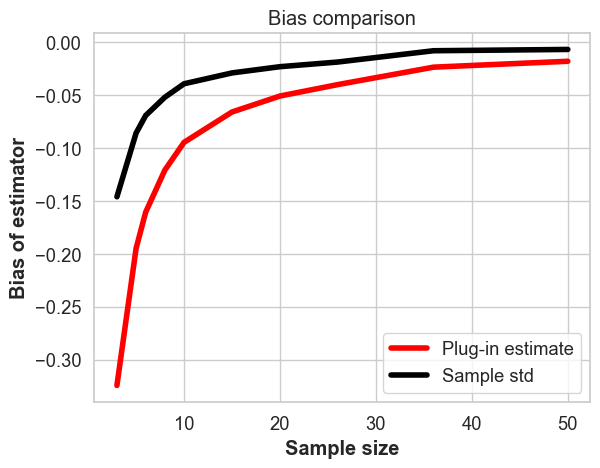

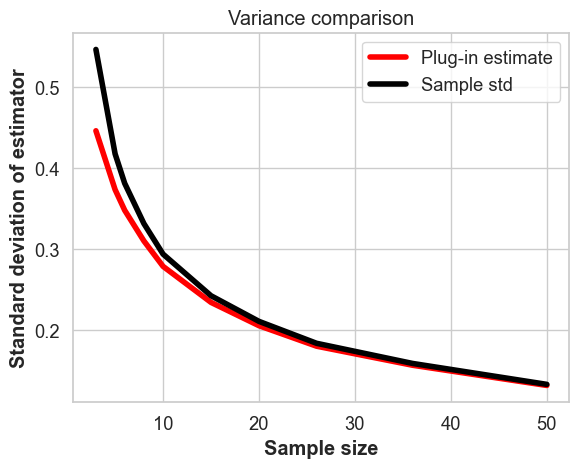

In [45]:
sample_sizes = [3, 5, 6, 8, 10, 15, 20, 26, 36, 50]
num_sizes = len(sample_sizes)

all_plug_in_stds = np.zeros((num_samples, num_sizes))
all_sample_stds = np.zeros((num_samples, num_sizes))

for i, n in enumerate(sample_sizes):
    samples = realPopulation.rvs(size=(n, num_samples))
    all_plug_in_stds[:, i] = np.std(samples, ddof=0, axis=0)
    all_sample_stds[:, i] = np.std(samples, ddof=1, axis=0)

plt.figure()
plt.plot(sample_sizes, np.mean(all_plug_in_stds, axis=0)-pop_std, color='r', linewidth=4, label='Plug-in estimate')
plt.plot(sample_sizes, np.mean(all_sample_stds, axis=0)-pop_std, color='k', linewidth=4, label='Sample std')
plt.xlabel('Sample size')
plt.ylabel('Bias of estimator')
plt.title('Bias comparison')
plt.legend(loc='best')


plt.figure()
plt.plot(sample_sizes, np.std(all_plug_in_stds, axis=0), color='r', linewidth=4, label='Plug-in estimate')
plt.plot(sample_sizes, np.std(all_sample_stds, axis=0), color='k', linewidth=4, label='Sample std')
plt.xlabel('Sample size')
plt.ylabel('Standard deviation of estimator')
plt.title('Variance comparison')
plt.legend(loc='best')


# Plots

## Plot data and model

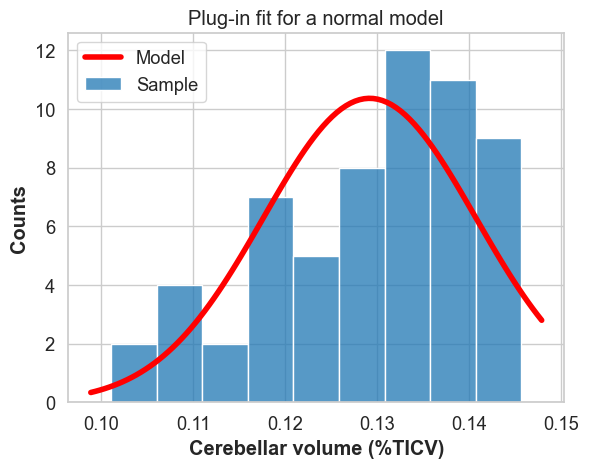

In [22]:
# create figure and plot histogram
fig, ax = plt.subplots()

bw = 0.005
ax = sns.histplot(cblmSample, ax=ax, binwidth=bw, kde=False, label='Sample', axes=ax)

# compute normal distribution parameters and plot
xLim = ax.get_xlim()
x = np.linspace(xLim[0], xLim[1], 100)

N = len(cblmSample)
xBar = np.mean(cblmSample)
s = np.std(cblmSample, ddof=1)

x_model = np.linspace(xLim[0], xLim[1], 100)
y_model = norm(loc=xBar, scale=s).pdf(x_model)


ax.plot(x_model, y_model*N*bw,
             color='r', linewidth=4, label='Model')

# set axis labels and title, add legend
ax.set_xlabel('Cerebellar volume (%TICV)')
ax.set_ylabel('Counts')
ax.set_title('Plug-in fit for a normal model')
ax.legend()


## Boxplots

### Simple boxplot


Text(0.5, 1.0, 'Data shown as boxplot')

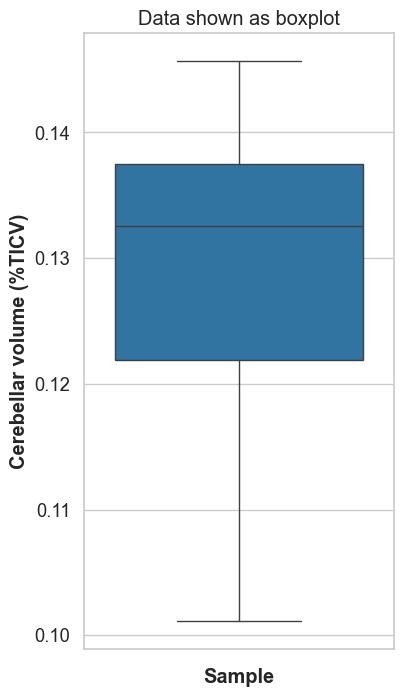

In [23]:
# create boxplot
fig, ax = plt.subplots(figsize=(4,8))
sns.boxplot(y=cblmSample, ax=ax)

# set axis labels and title
ax.set_xlabel('Sample')
ax.set_ylabel('Cerebellar volume (%TICV)')
ax.set_title('Data shown as boxplot')

### Boxplot with data

Text(0.5, 1.0, 'Boxplot with overlaid data')

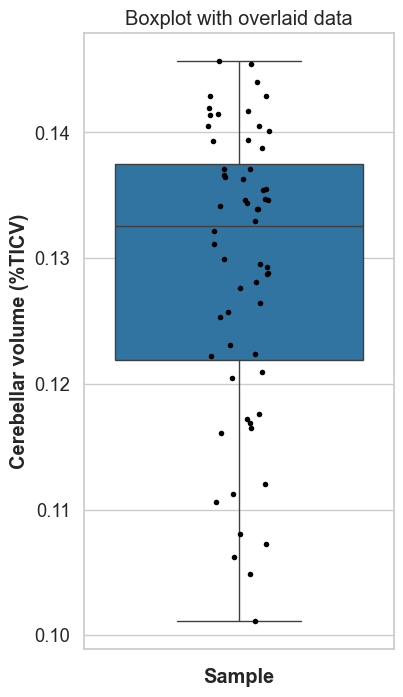

In [24]:
# create boxplot with overlaid data
fig, ax = plt.subplots(figsize=(4,8))
sns.boxplot(y=cblmSample, ax=ax)
sns.stripplot(y=cblmSample, color='black', size=4, ax=ax)


# set axis labels and title
ax.set_xlabel('Sample')
ax.set_ylabel('Cerebellar volume (%TICV)')
ax.set_title('Boxplot with overlaid data')

### Boxplot with data and fit

Text(0.5, 1.0, 'Boxplot with overlaid data and normal fit')

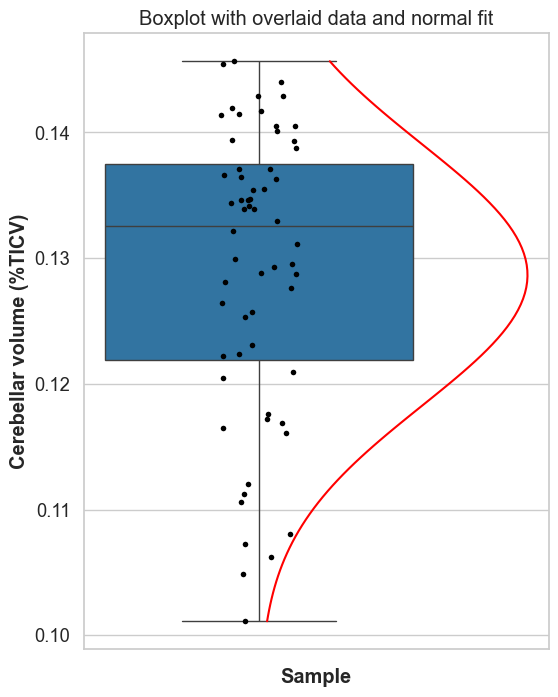

In [25]:
# create boxplot with overlaid data and normal fit
fig, ax = plt.subplots(figsize=(6,8))
sns.boxplot(y=cblmSample, ax=ax)
sns.stripplot(y=cblmSample, color='black', size=4, ax=ax)

model_x = np.linspace(cblmSample.min(), cblmSample.max(), 100)
model_y = norm.pdf(x, loc=np.mean(cblmSample), scale=np.std(cblmSample))*0.02
sns.lineplot(x=model_y, y=model_x, orient='y', color='red', ax=ax)

# set axis labels and title
ax.set_xlabel('Sample')
ax.set_ylabel('Cerebellar volume (%TICV)')
ax.set_title('Boxplot with overlaid data and normal fit')

# Bootstrapping

## Create a normal model of the population

xBar = 0.129
xStd = 0.0116


Text(0.5, 1.0, 'Estimated population of volumes')

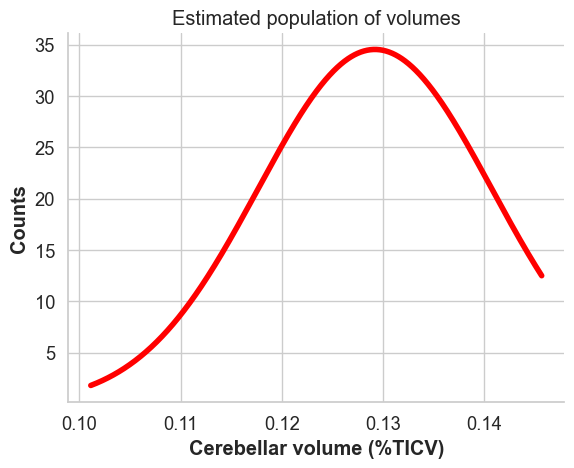

In [26]:
xBar = cblmSample.mean()
xStd = cblmSample.std()
print(f'xBar = {xBar:.3g}')
print(f'xStd = {xStd:.3g}')

normalEstimateCblmPopulation = norm(xBar, xStd)

sns.set_style('whitegrid')
x = np.linspace(np.min(cblmSample), np.max(cblmSample), 1000)
sns.lineplot(x=x, y=normalEstimateCblmPopulation.pdf(x), color='red', lw=4)
sns.despine()
plt.xlabel('Cerebellar volume (%TICV)')
plt.ylabel('Counts')
plt.title('Estimated population of volumes')

## Take samples from this model

mean(bootSample[0] = 0.1297)
mean(bootSample[1] = 0.12802)
mean(bootSample[2] = 0.12873)
mean(bootSample[3] = 0.12949)


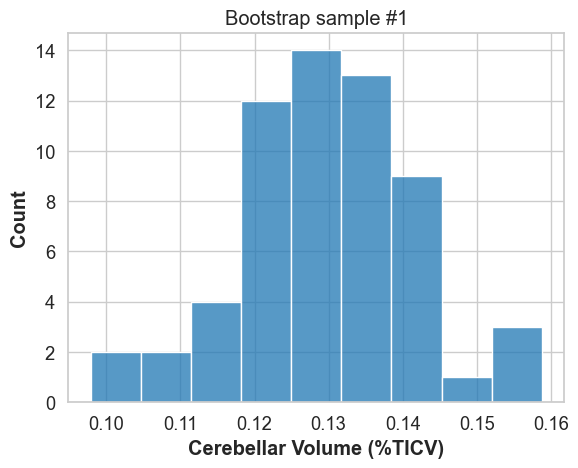

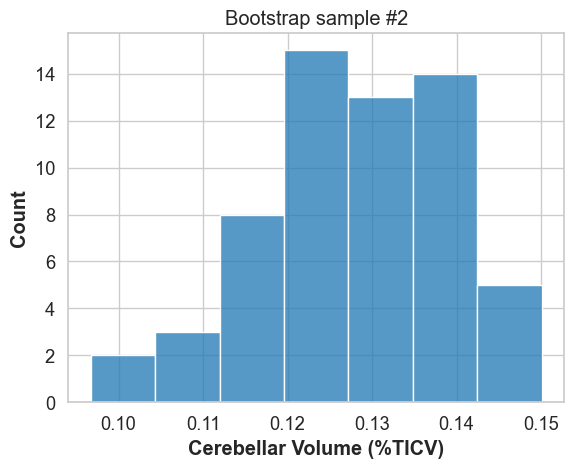

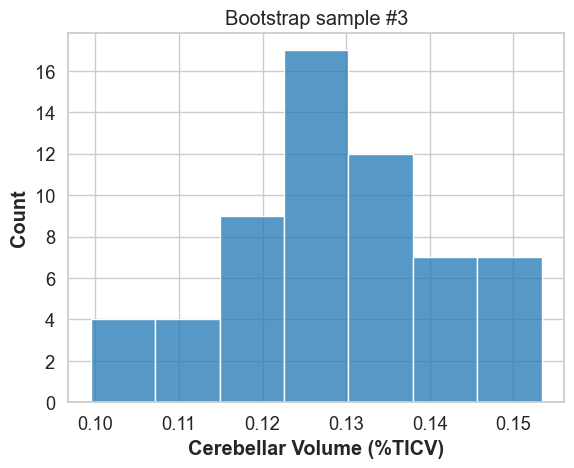

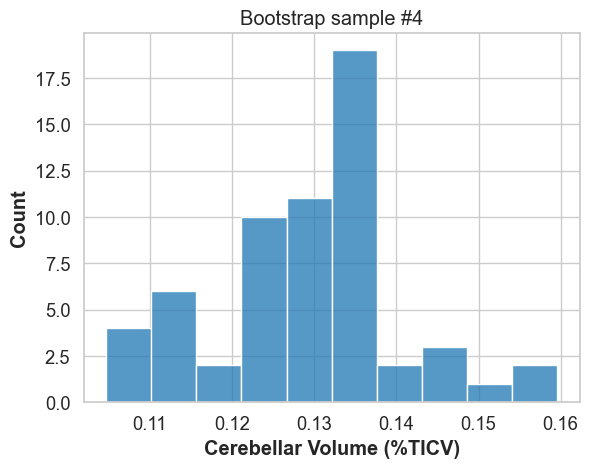

In [27]:
numBoot = 1000
paramBootstrapSamples = normalEstimateCblmPopulation.rvs(size=(N, numBoot))
numShowSamples = 4

for sampleNum in range(numShowSamples):
    thisSample = paramBootstrapSamples[:, sampleNum]
    plt.figure()
    sns.histplot(thisSample, bins='auto')
    plt.xlabel('Cerebellar Volume (%TICV)')
    plt.ylabel('Count')
    plt.title(f'Bootstrap sample #{sampleNum + 1:.3g}')
    print(f'mean(bootSample[{sampleNum}] = {np.mean(thisSample):.5g})')

## Generate the parametric bootstrapped distribution

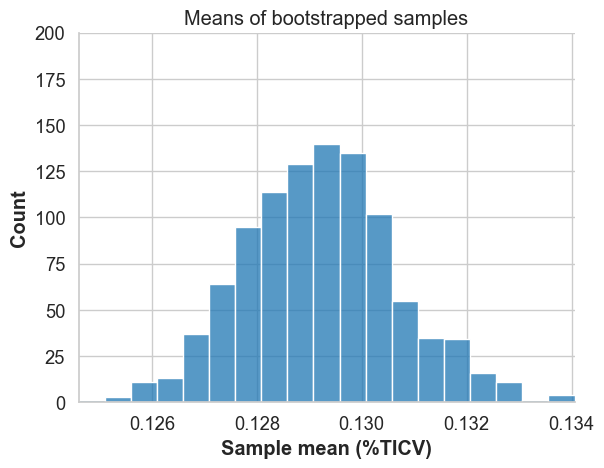

In [28]:
paramBootstrapMeans = np.mean(paramBootstrapSamples, axis=0)
histEdges = np.linspace(np.min(paramBootstrapMeans), np.max(paramBootstrapMeans), 20)

sns.histplot(paramBootstrapMeans, bins=histEdges)
plt.xlabel('Sample mean (%TICV)')
plt.ylabel('Count')
plt.title('Means of bootstrapped samples')
plt.xlim([min(histEdges), max(histEdges)])
plt.ylim([0, numBoot // 5])
sns.despine()


## Sample as model

Text(0.5, 1.0, 'Population identical to sample')

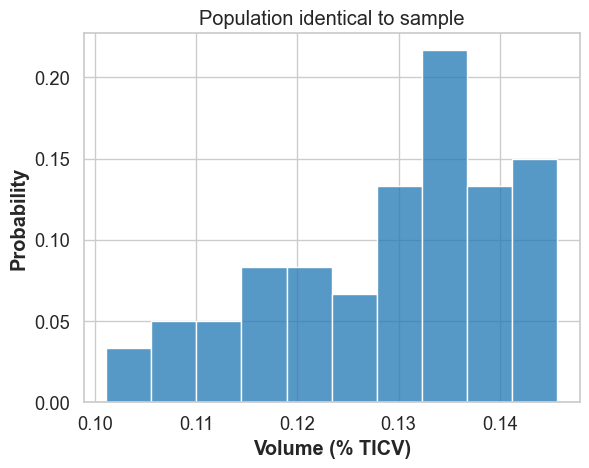

In [29]:
sns.histplot(data=cblmSample, kde=False, bins=10, stat='probability')
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)
plt.xlabel('Volume (% TICV)')
plt.ylabel('Probability')
plt.title('Population identical to sample')


In [30]:
bootstrapMeans = pd.Series([cblmSample.sample(frac=1, replace=True).mean() for i in range(numBoot)])
print(bootstrapMeans)

0      0.130070
1      0.129801
2      0.128591
3      0.130807
4      0.131472
         ...   
995    0.129278
996    0.128855
997    0.128763
998    0.129608
999    0.132350
Length: 1000, dtype: float64


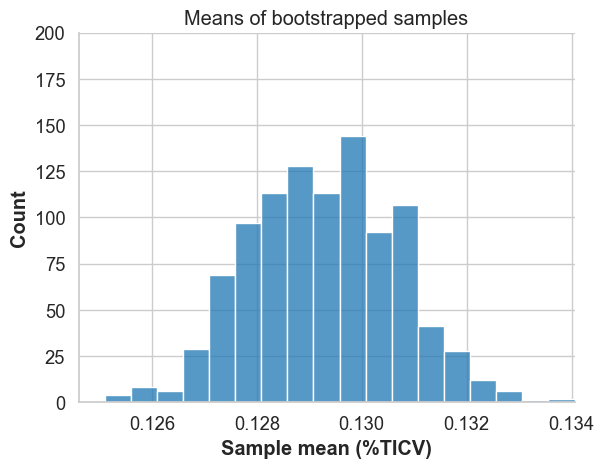

In [31]:
sns.histplot(bootstrapMeans, bins=histEdges)
plt.xlabel('Sample mean (%TICV)')
plt.ylabel('Count')
plt.title('Means of bootstrapped samples')
plt.xlim([min(histEdges), max(histEdges)])
plt.ylim([0, numBoot // 5])
sns.despine()


### Compare parameterized and regular bootstrap

In [32]:
bootstrapMeans.describe()

count    1000.000000
mean        0.129276
std         0.001397
min         0.125468
25%         0.128255
50%         0.129285
75%         0.130303
max         0.133918
dtype: float64

In [33]:
pd.Series(paramBootstrapMeans).describe()

count    1000.000000
mean        0.129213
std         0.001447
min         0.124602
25%         0.128221
50%         0.129202
75%         0.130121
max         0.134053
dtype: float64

## The variance of the sample mean

Text(0.5, 1.0, '1 / Variance of sample mean')

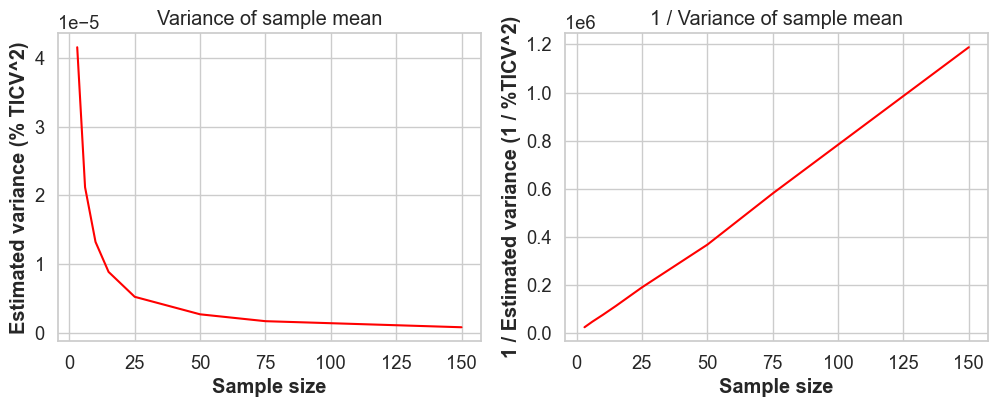

In [34]:
bootstrappedVarOfMean = []
for thisN in sample_sizes:
    bootstrapSamples = cblmSample.sample(n=thisN * numBoot, replace=True).values.reshape(thisN, numBoot)
    bootstrapMeans = bootstrapSamples.mean(axis=0)
    bootstrappedVarOfMean.append(bootstrapMeans.var(ddof=1))

bootstrappedVarOfMean = np.array(bootstrappedVarOfMean)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(sample_sizes, bootstrappedVarOfMean, 'r')
axes[0].set_xlabel('Sample size')
axes[0].set_ylabel('Estimated variance (% TICV^2)')
axes[0].set_title('Variance of sample mean')

axes[1].plot(sample_sizes, 1 / bootstrappedVarOfMean, 'r')
axes[1].set_xlabel('Sample size')
axes[1].set_ylabel('1 / Estimated variance (1 / %TICV^2)')
axes[1].set_title('1 / Variance of sample mean')
